In [10]:
hero_names = [u'adagio',
 u'ardan',
 u'vox',
 u'krul',
 u'celeste',
 u'ringo',
 u'catherine',
 u'skaarf',
 u'koshka',
 u'taka',
 u'petal',
 u'rona',
 u'glaive',
 u'saw',
 u'joule',
 u'fortress']

In [27]:
import csv

bi_matrices = []
for m in ['A', 'B']:
    f = open('%s-10.csv' % m, 'r')
    csvrdr = csv.reader(f)
    bi_matrices.append(-matrix([[float(ele) for ele in row] for row in csvrdr]))
    f.close()

g = NormalFormGame(bi_matrices)

Let us take a look at the payoff matrix:

In [28]:
g.payoff_matrices()[0].n(digits=2)

[-0.56  0.00  0.00  -1.2 -0.31 -0.88  -2.6 -0.62  -1.8  -1.2  -1.8  0.00  -1.8  -1.5  -1.1  0.00]
[-0.56  -1.2 -0.62  -1.8 -0.38 -0.88 -0.56 -0.81  -1.3  -1.3 -0.94 -0.50  -1.5  -2.1  -1.4  0.00]
[ -1.8  -1.3  -2.0  -2.6  -2.2  -3.3  -1.1  -1.5  -3.3  -3.7  -1.3 -0.31  -1.8  -1.5  -1.3 -0.50]
[ -2.2  -1.4  -1.8  -2.6  -2.2  -2.4  -3.0  -2.6  -2.4  -3.6  -2.3 -0.50  -2.1  -3.1  -2.2 -0.38]
[-0.75  -1.7 -0.75  -2.0  -1.6  -2.8  -2.2  -1.6  -5.0  -5.4  -2.1  0.00  -4.2  -1.4 -0.75  -1.2]
[ -1.7  -1.3 -0.69  -1.6 -0.88  -1.3  -2.9  -1.1  -3.1  -2.7  -2.2  0.00  -2.8  -1.7  -1.7 -0.38]
[ -2.6 -0.31  0.00  -2.1 -0.44  -1.8  -2.0  -1.3  -1.7  -1.5  -2.9  0.00  -2.1  -1.9  -1.0  0.00]
[ -1.8 -0.62 -0.94  -2.9 -0.31  -2.6  -2.9  -1.6  -3.6  -5.8  -4.0  0.00  -4.2  -1.2  -1.2 -0.31]
[-0.56  0.00  0.00  -1.8  0.00  -1.1  -1.4 -0.44 -0.62 -0.44 -0.44  0.00  -1.6 -0.62 -0.88  0.00]
[ -1.7 -0.56 -0.88  -2.0 -0.75 -0.94  -2.9 -0.75  -2.3  -2.5  -1.5  0.00  -3.1  -1.8  -1.3 -0.50]
[ -1.2  -1.4  -1.1  

Here is a graphical representation of this for the row player:

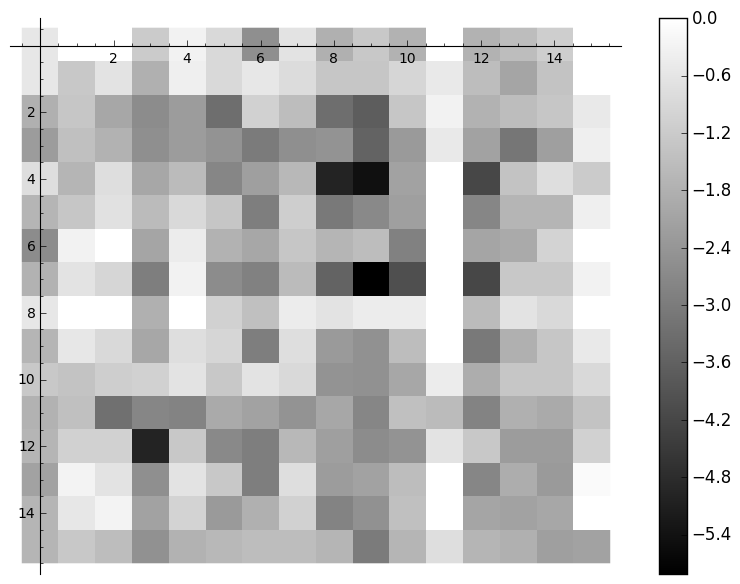

In [29]:
plot(g.payoff_matrices()[0], colorbar=True)

Here is the same for the column player (as expected these are just reflections of each other in the diagonal):

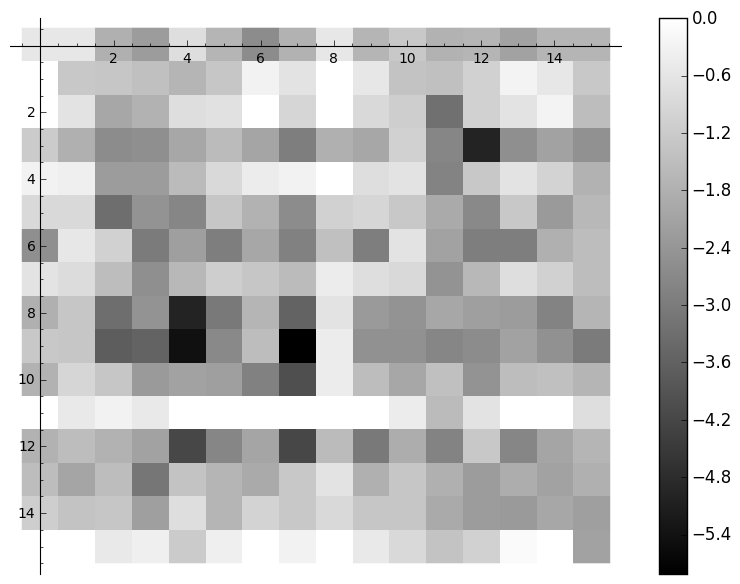

In [30]:
plot(g.payoff_matrices()[1], colorbar=True)

Check if the game is degenerate:

In [31]:
g.is_degenerate()

True

Let us find the best responses to each player.

In [32]:
N = len(hero_names)
best_response_dictionary = {}
for i in range(1, N + 1):
    strategy = [0 for k in range(i - 1)] + [1] + [0 for k in range(N - i)]
    hero = hero_names[i - 1]
    best_responses = [hero_names[br] for br in g.best_responses(strategy,0)]
    best_response_dictionary[hero] = best_responses
    print hero +": " 
    for br in best_responses:
        print "\t", br

adagio: 
	adagio
	ardan
	koshka
ardan: 
	adagio
	koshka
vox: 
	adagio
	catherine
	koshka
krul: 
	petal
celeste: 
	koshka
ringo: 
	adagio
	ardan
catherine: 
	ardan
skaarf: 
	koshka
koshka: 
	koshka
taka: 
	koshka
petal: 
	koshka
rona: 
	adagio
	celeste
	ringo
	catherine
	skaarf
	koshka
	taka
	saw
	joule
glaive: 
	glaive
saw: 
	koshka
joule: 
	celeste
fortress: 
	adagio
	ardan
	catherine
	koshka
	joule


Here is a graphical representation of the above:

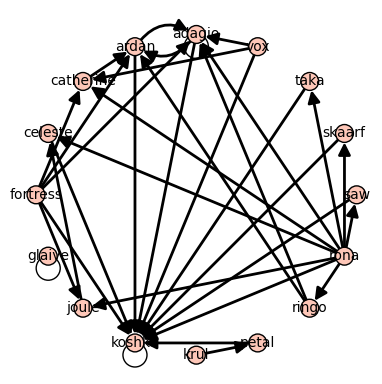

In [33]:
G = DiGraph(best_response_dictionary)
G.show(layout='circular')

Obtain the NE

In [34]:
NEs = g.obtain_nash(algorithm='lrs')

How many NE are there?

In [35]:
len(NEs)

6

In [36]:
def analyse_set_of_NE(NEs):
    """Go through the NEs and analyse"""
    
    return [sum([vector(ne[player])/len(NEs) for ne in NEs]) for player in [0, 1]]       

In [37]:
mean_ne = analyse_set_of_NE(NEs)

In [38]:
import matplotlib.pyplot as plt

N = len(hero_names)
p1 = mean_ne[0]
p2 = mean_ne[1]


heroes = range(N)  # the x locations for the heroes
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(heroes, p1, width, color='black')
rects2 = ax.bar([h + width for h in heroes], p2, width, color='grey')

# add some text for labels, title and axes ticks
ax.set_ylabel('Probability')
ax.set_title('Mean probability for both players accross all equilibria')
ax.set_xticks([h + width for h in heroes])
ax.set_xticklabels(hero_names, rotation='vertical')
plt.savefig("plot.pdf", bbox_inches='tight')

Based on this not all heroes are actually played.

In [39]:
heroes_that_are_played = [hero_names[i] for i in range(len(hero_names)) if mean_ne[0][i] !=0]
heroes_that_are_not_played = [hero for hero in hero_names if hero not in heroes_that_are_played]

In [40]:
heroes_that_are_played

[u'adagio', u'ardan', u'koshka', u'glaive']

In [41]:
heroes_that_are_not_played

[u'vox',
 u'krul',
 u'celeste',
 u'ringo',
 u'catherine',
 u'skaarf',
 u'taka',
 u'petal',
 u'rona',
 u'saw',
 u'joule',
 u'fortress']

Let us redraw the best response dynamics indicating heroes that should (blue) and should not be played (red).

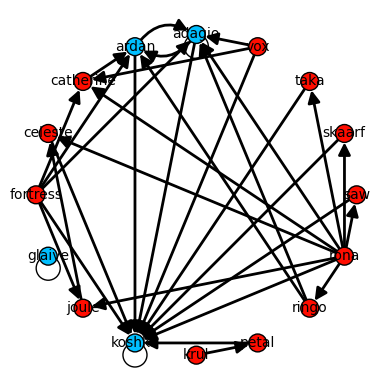

In [42]:
G.show(layout='circular', vertex_colors={(0,.75,1):heroes_that_are_played, (1,.05,0):heroes_that_are_not_played})